# Assignment 1 - Jared Mercier - Due 2017-10-04

# 1. Signal Processing


# Question 1

# Introduction
--------------

This Notebook is the simplest example for how to run one single piece of code in Python for the course. Edit someting.

In [1]:
#This is the simplest of the codes for Python


txt="Python is great!"
txt2=" The editor of this code is Jared Mercier"
print('\n Hello world! '+txt+txt2)



 Hello world! Python is great! The editor of this code is Jared Mercier


We just ran our first Python code on a notebook!

Test your knowledge:

* Execute 3 of the code examples in the tutorial and add some Markdown cells


Markdown Inserted below


https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference

# Question 2

Total Number of Lines that have a noisy signal higher than thresold of 500 
130

Line Number:
104
Amplitude at 4.5MHz: 
474.334340549

Line Number:
105
Amplitude at 4.5MHz: 
552.975779113

Line Number:
106
Amplitude at 4.5MHz: 
683.005145289

Line Number:
107
Amplitude at 4.5MHz: 
744.915710577

Line Number:
108
Amplitude at 4.5MHz: 
773.775445257

Line Number:
109
Amplitude at 4.5MHz: 
805.515594083

Line Number:
110
Amplitude at 4.5MHz: 
741.137101801

Line Number:
111
Amplitude at 4.5MHz: 
725.312349209

Line Number:
112
Amplitude at 4.5MHz: 
694.254298807

Line Number:
113
Amplitude at 4.5MHz: 
604.901684219

Line Number:
114
Amplitude at 4.5MHz: 
458.008713697

Line Number:
153
Amplitude at 4.5MHz: 
556.602374329

Line Number:
154
Amplitude at 4.5MHz: 
644.416457934

Line Number:
155
Amplitude at 4.5MHz: 
752.873352253

Line Number:
156
Amplitude at 4.5MHz: 
815.574996535

Line Number:
157
Amplitude at 4.5MHz: 
955.198138367

Line Number:
158
Amplitude at 4.5MHz: 
949.83612055

Li

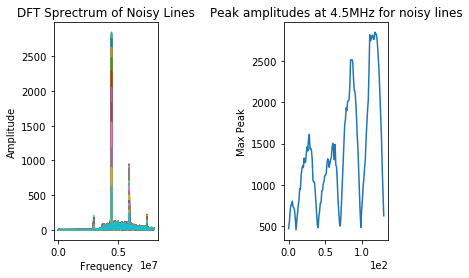

In [80]:
%matplotlib inline


import scipy as Sci
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

#this here only adjust the aspect of the plots
fig, axs = plt.subplots(2,1,sharex=True)
plt.subplots_adjust(wspace = 1.2, hspace = .5 )


fil = open('UltrasoundSampleSignal.dat','rb')
AllSignal = np.fromfile(fil,count=-1,dtype=np.uint16)
f=np.arange(0,125e6/2,125e6/15000)

# Obtain noise threshold
# Determine the array position for 4.5MHz
FirstLine=AllSignal[:15000]
dataF=FirstLine-np.mean(FirstLine)
L=len(dataF)
f=np.arange(0,125e6/2,125e6/15000)
Y=np.fft.fft(dataF)
PyyClean=abs(Y)/L
#print(inx[0]) Prints 541. I examined the amplitudes at this position and the nothing noticable big.
#Array position 535 contains huge peaks
threshold = np.max(PyyClean[535]) + 400 #approximately 456







list1 = []
list2 = []




#Locate noisy lines
for index in range(462):
    line = AllSignal[(index)*15000:(index+1)*15000]
    dataF=line-np.mean(line)#eliminate dc 
    L=len(dataF) #15000
    Y=np.fft.fft(dataF) #Peform FFT
    DFT=abs(Y)/L #Ignoring the negative half frequency spectrum
    
    # Determines if noisy signal is above threshold, specfically at the spectrum of 4.5MHz
    if DFT[535] > threshold:
        list1.append(index)    #appends the index (line number) in a list
        list2.append(DFT[535]) #appends the amplitude at 4.5MhZ in a list
        inx=np.where(f>8.0e6)  
        inx=inx[0]
        plt.subplot(121)
        plt.plot(f[:inx[0]], DFT[:inx[0]])
        plt.title('DFT Sprectrum of Noisy Lines')
        plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
        plt.xlabel('Frequency')
        plt.ylabel('Amplitude')
          
        
# Plots peak magnitudes at 4.5MHz of the acquired noisy lines

g=np.arange(0,len(list2),1)
plt.subplot(122)
plt.plot(g, list2[0:len(list2)])#0-126 x-axis does not include offsets
plt.title('Peak amplitudes at 4.5MHz for noisy lines')
plt.ylabel('Max Peak')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
print('Total Number of Lines that have a noisy signal higher than thresold of 500 ')
print(len(list1))       
print('')



#Display the line numbers where the noisy lines are located        
for x in range(len(list1)):
    print('Line Number:')
    print(list1[x])
    print('Amplitude at 4.5MHz: ')
    print(list2[x])
    print('')
    
    
#Determine the noisiest line within the entire signal
noisiest_line = 0
Largest_Amp = np.max(list2)


#Determine the location of the index
for z in range(462):
    
    line = AllSignal[(z)*15000:(z+1)*15000]
    dataF=line-np.mean(line)#eliminate dc 
    L=len(dataF) #15000
    Y=np.fft.fft(dataF) #Peform FFT
    DFT=abs(Y)/L #Ignoring the negative half frequency spectrum
    
    if DFT[535] == Largest_Amp:
        noisiest_line = z
        
    
print('The noisiest line at 4.5MHz is line: ')
print(noisiest_line)
print('With an amplitude of: ')
print(Largest_Amp)






# Question 3

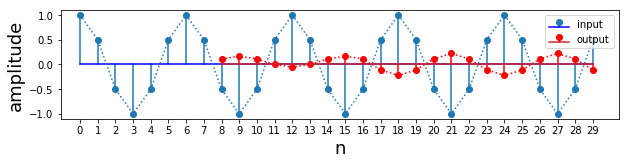

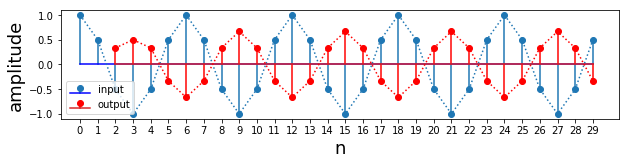

In [90]:
%matplotlib inline
from __future__ import division
from scipy import signal 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec


ma_length = 9 # moving average filter length
fig=plt.figure()
fig.set_size_inches((10,5))
ax = fig.add_subplot(plt.subplot(gs[1,:]))
Ns=30
n= np.arange(Ns)
x = np.cos(np.arange(Ns)*np.pi/3.)  #building the signal with a frequency of 2pi/6
y= signal.lfilter(np.ones(ma_length)/ma_length,1,x)  #applying the filter that uses 9 coefficients that are equal to 1
ax.stem(n,x,label='input',basefmt='b-')
ax.plot(n,x,':')
ax.stem(n[ma_length-1:],y[:-ma_length+1],markerfmt='ro',linefmt='r-',label='output')
ax.plot(n[ma_length-1:],y[:-ma_length+1],'r:')
ax.set_xlim(xmin=-1.1)
ax.set_ylim(ymin=-1.1,ymax=1.1)
ax.set_xlabel("n",fontsize=18)
ax.set_xticks(n)
ax.legend(loc=0)
ax.set_ylabel("amplitude",fontsize=18);


ma_length = 3 # moving average filter length
fig=plt.figure()
fig.set_size_inches((10,5))
ax = fig.add_subplot(plt.subplot(gs[1,:]))
Ns=30
n= np.arange(Ns)
x = np.cos(np.arange(Ns)*np.pi/3.)  #building the signal with a frequency of 2pi/6
y= signal.lfilter(np.ones(ma_length)/ma_length,1,x)  #applying the filter that uses 9 coefficients that are equal to 1
ax.stem(n,x,label='input',basefmt='b-')
ax.plot(n,x,':')
ax.stem(n[ma_length-1:],y[:-ma_length+1],markerfmt='ro',linefmt='r-',label='output')
ax.plot(n[ma_length-1:],y[:-ma_length+1],'r:')
ax.set_xlim(xmin=-1.1)
ax.set_ylim(ymin=-1.1,ymax=1.1)
ax.set_xlabel("n",fontsize=18)
ax.set_xticks(n)
ax.legend(loc=0)
ax.set_ylabel("amplitude",fontsize=18);


The 9 point average filter has a slower response (larger phase delay) compared to the 3 point average filter. The 9 point filter also provides a greater attenuation to the input signal, compared to the 3 point.

# Investigation

  An Electroencephalogram (EEG) is a signal processing technique which maps out the electrical activity generated from the brain. The main electrical source detected from the EEG is from the neurons located in the cerebral cortex, known as pyramidal cells. The cells are formed in a parallel arrangement which produce summed electrical dipoles that can be measured from the scalp or directly measured through an invasive surgical process. EEG’s have become a major source of diagnosis for epileptic patients. EEG’s can measure the abnormalities present in the brain, which can correlate to the subject having a seizure.

  The summed electric dipoles generated from the brain are measured using electrodes. The electric dipoles are due to the action potentials that occur in the cell membrane of the nerve cells. The action potentials that occur in the cell membrane contain voltages in the millivolt range which produce action current. The cell membrane is the main communications link to the electrodes. The electrodes detect the action current and convert it into a sinusoidal voltage signal with a specific frequency. This is the critical component for the data acquisition stage. The electrodes sense the small action potential’s generated from the brain and convert it into an electrical signal to be processed. The electrodes use a conductive gel, which reduces the impedance of the skin, since the signals emitted from the pyramidal cells must penetrate through the skin and skull, their amplitudes gets attenuated. Therefore, the electrodes detect signals typically in the 0.5µVpp - 100 µVpp range. The standard electrode arrangement is in such a fashion where they actively measure from the left, ride and center of the scalp. The following displays the electrode and its corresponding identification:
Left area electrodes: Fp1, F7, F3, T3, C3, P3, T5, 01.
Right area electrodes: Fp2, F8, F4, T4, C4, P4, T6, 02.
Center electrodes: Fz, Cz, Pz.

  The signals acquired from the electrodes are noisy, low in amplitude and contain irrelevant information. Therefore, the signal processing or preprocessing stage occurs. Amplifier stages typically provide the next path for the EEG signal. Operational amplifiers are configured to provide large gains to the signal, remove the DC components and reduce the noise. An example of an amplifier used in EEG applications, is the average reference differential amplifier. The two inputs are the signal from one single electrode and an average of all the other signals being currently measured at that specific time. Other common types of amplifiers used are instrumentation ampifers. The signal processing stage will also contain driver circuits to improve the isolation between the signal path.
  
 
Typical brain waves exhibit relevant information in the frequency range of 2Hz - 120Hz. The frequency of brain waves is placed in specific categories as followed: Gamma (>30Hz), Beta (13-30Hz), Alpha (8-13Hz), Theta (4-8Hz), Delta (0.5-4Hz). Before the filtering occurs, the signal may or may not be passed through an A-D converter, therefore, both digital and analog filters find use in EEG applications, with the former being more common. Digital IIR or FIR filters are used to decompose the frequency bands (i.e. Gamma, Theta, etc.) before the feature extraction process occurs. Within this bandwidth there contains noise components, such as, the 60Hz power line noise, eye movement of <1Hz, and muscle movements at 70Hz>. To eliminate the power line noise, narrow band-stop filters (notch filters) are commonly used. A high pass and low pass filter can be used to eliminate the other two noise components (eye movement and muscle movement) respectively. 
	

  Once the signal has been preprocessed either in the digital or analog domain there is variety of feature extraction techniques used in EEG applications. Techniques such as the Fourier transform, wavelet transform, Hilbert transform, and power spectral density. The use of these techniques provides a better understanding of the amplitudes of the signals contained within the frequency bands. Once the feature extraction process has taken place, the EEG recordings from each individual electrode is mapped out on a monitor with its amplitude on the y-axis and time on the x-axis. A conversion from the frequency to discrete time domain will therefore occur. In modern applications, the use of D-A converters do not find that much use.
  
  
  Experimental data has provided interesting insight regarding the emitted frequencies from the brain depending on the subject’s state (e.g. thinking, sleeping, relaxed, etc.). For example, when the patient is awake they will exhibit stronger beta waves. If the patient is relaxed, the frequency will drop into the alpha category. This insight provides useful for the expectation of the EEG readings. The most common hypothesis test in EEG applications is if the patient is having a seizure or not. Identifying if the patient is having a seizure can depend on the expertise of the individual performing the diagnosis, the type and severity of the seizure the patient experiences and existing EEG data of the patient. For strong epileptic episodes, noticeable spikes in amplitude of the EEG reading will be displayed throughout each electrode.


  In summary, an EEG requires electrodes to acquire the desired signal generated from the brain. Then the amplification and filtering stages occur, this reduces irrelevant information and amplifies the signal. Feature extraction techniques such as the Fourier transform are used to examine the amplitudes further, which can also be useful within the filtering process, by separating the frequency bands and observing each band alone. Usually, the signal will be converted back into the time domain and displayed on a monitor. The main hypothesis test is if the subject is experiencing a seizure or not.





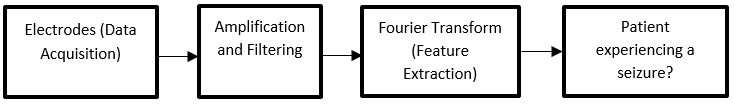

In [72]:
#Simplified block diagram for EEG signal processing and conditioning 

from IPython.display import Image
Image(filename='flowchart.png')


References
---------------

* A. R. Zapata Ferrer et al., "Design and construction of a system to be used in clinical EEG signal processing," Proceedings of 17th International Conference of the Engineering in Medicine and Biology Society, Montreal, Que., 1995, pp. 925-926 vol.2.
* N. Chimitt, W. Misch, L. Tan, A. Togbe and J. Jiang, "Comparative study of simple feature extraction for single-channel EEG based classification," 2017 IEEE International Conference on Electro Information Technology (EIT), Lincoln, NE, USA, 2017, pp. 166-170.
* N. Ahmed, D. Hein, D. Walker, D. Parikh and B. Vujjini, "On the Digital Processing of EEG Data," IEEE 1976 International Symposium on Electromagnetic Compatibility, Washington, D.C., 1976, pp. 1-5.
* T. L. Dixon and G. T. Livezey, "Wavelet-based feature extraction for EEG classification," Proceedings of 18th Annual International Conference of the IEEE Engineering in Medicine and Biology Society, Amsterdam, 1996, pp. 1003-1004 vol.3.
* J. Nikola, P. Ratko, D. Strahinja and P. B. Dejan, "A novel AC-amplifier for electrophysiology: active DC suppression with differential to differential amplifier in the feedback-loop," 2001 Conference Proceedings of the 23rd Annual International Conference of the IEEE Engineering in Medicine and Biology Society, 2001, pp. 3328-3331 vol.4.
